## Ниже представлены ссылки на более удачные попытки
#### <a href='#dense'> 1 попытка стандартная Dense сеть</a>
#### <a href='#emb_Conv1D'>2 попытка Embedding + Conv1D</a>
#### <a href='#emb_Conv1D_window'>3 попытка Embedding + Conv1D <br> Обучение по средствам плавающего окна</a>
---


# 1 попытка стандартная Dense сеть
<a id="dense"></a>

In [4]:
# Базовые библиоткеи
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Для работы с сетями
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# Обычные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten

# Инструменты обработки текста
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

### Загрузка данных

Перед началом работы, необходимо импортировать данные, сделать это можно при помощи стандартных os библиотек, для чтения данных и pandas для хранения и изменения

In [2]:
# Путь к базе
path = 'база болезней/'
# При помощи простого выражения (list comprehension) можно создать список из всех болезней
diseases_names = [x.split('.')[0] for x in os.listdir(path)]
diseases_names

['Аппендицит',
 'Гастрит',
 'Гепатит',
 'Дуоденит',
 'Колит',
 'Панкреатит',
 'Холицестит',
 'Эзофагит',
 'Энтерит',
 'Язва']

In [3]:
# Создание набора данных (DataFrmae)
df = pd.DataFrame(columns=['disease_name', 'disease_description'])
# При помощи цикла проходимся по списку
for disease in diseases_names:
    # Открываем каждый файл для чтения
    with open(path+disease+'.txt', mode='r', encoding='utf-8-sig') as f:
        current_disease = f.read()
        # Добавление названия болещни и ее описания в набор данных
        df = pd.concat([df, pd.DataFrame({'disease_name':[disease], 'disease_description':[current_disease]})], ignore_index=True)

In [4]:
# Удаление лишних символов переноса строки
df['disease_description'] = df['disease_description'].apply(lambda x: x.replace('\n', ' '))
df

,disease_name,disease_description
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,..."
4,Колит,"постоянные позывы на дефекацию, урчание, вздут..."
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...
6,Холицестит,"тупая, ноющая боль в области правого подреберь..."
7,Эзофагит,затруднения и болезненные ощущения при глотани...
8,Энтерит,внезапныые боли (преимущественно в середине жи...
9,Язва,"боль, часто локализованная в эпигастрии и умен..."


In [5]:
all_diseases_description = ' '.join(df['disease_description'].values)

### Обучение токенизатора

In [6]:
max_words_count = 1800
tokenizer = Tokenizer(num_words=max_words_count,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='unknown'
)

tokenizer.fit_on_texts([all_diseases_description])
items = list(tokenizer.word_index.items())
print(items[:100])
print("Размер словаря", len(items)) # Длина словаря

[('unknown', 1), ('в', 2), ('и', 3), ('боль', 4), ('тошнота', 5), ('или', 6), ('рвота', 7), ('боли', 8), ('живота', 9), ('при', 10), ('животе', 11), ('после', 12), ('области', 13), ('отрыжка', 14), ('с', 15), ('слабость', 16), ('аппетита', 17), ('во', 18), ('тела', 19), ('изжога', 20), ('вздутие', 21), ('может', 22), ('снижение', 23), ('пищи', 24), ('повышение', 25), ('температуры', 26), ('рту', 27), ('еды', 28), ('диарея', 29), ('на', 30), ('иногда', 31), ('до', 32), ('к', 33), ('метеоризм', 34), ('температура', 35), ('подреберье', 36), ('верхней', 37), ('части', 38), ('не', 39), ('правом', 40), ('стул', 41), ('потеря', 42), ('чувство', 43), ('общая', 44), ('эпигастральной', 45), ('желудка', 46), ('урчание', 47), ('–', 48), ('ощущение', 49), ('отсутствие', 50), ('ощущения', 51), ('понос', 52), ('нарушение', 53), ('позывы', 54), ('тяжести', 55), ('которая', 56), ('запор', 57), ('время', 58), ('приема', 59), ('кожи', 60), ('могут', 61), ('появление', 62), ('повышенная', 63), ('эпигастри

In [7]:
tokenizer.word_index['язв']

878

#### Преобразование данных

In [8]:
df['matrix_description'] = df['disease_description'].apply(lambda x: tokenizer.texts_to_matrix([x]))

In [9]:
df

,disease_name,disease_description,matrix_description
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,...","[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,Колит,"постоянные позывы на дефекацию, урчание, вздут...","[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
6,Холицестит,"тупая, ноющая боль в области правого подреберь...","[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
7,Эзофагит,затруднения и болезненные ощущения при глотани...,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
8,Энтерит,внезапныые боли (преимущественно в середине жи...,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
9,Язва,"боль, часто локализованная в эпигастрии и умен...","[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


#### Проверка распределения

Теперь, что бы убедится, что все коныертировалось верно, проверю матрицу

In [10]:
def onehot_to_text(mat,tokenizer, cutoff):
    mat = pd.DataFrame(mat)
    mat.rename(columns=tokenizer.index_word, inplace=True)
    output = mat.sum(axis=1)
    for row in range(mat.shape[0]):
        if output[row] == 0:
            output[row] = []
        else:
            output[row] = mat.columns[mat.iloc[row,:] >= cutoff].tolist()
    return(output)

In [11]:
'язв' in onehot_to_text(df['matrix_description'][9], tokenizer, 0.5)[0]

True

#### Индрексация названия болезней

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['disease_indexes'] = le.fit_transform(df['disease_name'].values)

In [13]:
df

,disease_name,disease_description,matrix_description,disease_indexes
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",2
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,...","[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",3
4,Колит,"постоянные позывы на дефекацию, урчание, вздут...","[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",4
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...,"[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",5
6,Холицестит,"тупая, ноющая боль в области правого подреберь...","[[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",6
7,Эзофагит,затруднения и болезненные ощущения при глотани...,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",7
8,Энтерит,внезапныые боли (преимущественно в середине жи...,"[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",8
9,Язва,"боль, часто локализованная в эпигастрии и умен...","[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",9


#### Обьединение данных и формирование обучающей и тестовой выборки

In [14]:
#Формируем матрицу индексов по принципу Bag of Words
xAll =  [x[0] for x in df['matrix_description'].values]#Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
xAll = np.array(xAll)
print(xAll.shape)  #Посмотрим на форму текстов

(10, 1800)


In [15]:
yAll = utils.to_categorical(df['disease_indexes'], df['disease_indexes'].shape[0]) # И выводим каждый лейбл в виде вектора длиной 22, с 1кой в позиции соответствующего класса и нулями
print(yAll.shape) # Посмотрим на форму лейблов категорий
print(yAll[0]) # И отдельно на первую строку

(10, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Создание сети

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=max_words_count))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(yAll.shape[0], activation='softmax'))

Компиляция модели

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Обучение модели

In [18]:
history = model.fit(xAll,
          yAll,
          batch_size=32,
          epochs=12,
          validation_split=0.2)

Epoch 1/12
1/1 [==============================] - 2s 2s/step - loss: 3.1883 - accuracy: 0.0000e+00 - val_loss: 2.2704 - val_accuracy: 0.5000
Epoch 2/12
1/1 [==============================] - 0s 35ms/step - loss: 1.9859 - accuracy: 0.3750 - val_loss: 2.2878 - val_accuracy: 0.5000
Epoch 3/12
1/1 [==============================] - 0s 34ms/step - loss: 2.2952 - accuracy: 0.1250 - val_loss: 2.3026 - val_accuracy: 0.5000
Epoch 4/12
1/1 [==============================] - 0s 32ms/step - loss: 3.9965 - accuracy: 0.0000e+00 - val_loss: 2.3204 - val_accuracy: 0.0000e+00
Epoch 5/12
1/1 [==============================] - 0s 34ms/step - loss: 2.1515 - accuracy: 0.3750 - val_loss: 2.3363 - val_accuracy: 0.0000e+00
Epoch 6/12
1/1 [==============================] - 0s 36ms/step - loss: 2.3631 - accuracy: 0.1250 - val_loss: 2.3553 - val_accuracy: 0.0000e+00
Epoch 7/12
1/1 [==============================] - 0s 35ms/step - loss: 2.2133 - accuracy: 0.2500 - val_loss: 2.3728 - val_accuracy: 0.0000e+00
Epoch

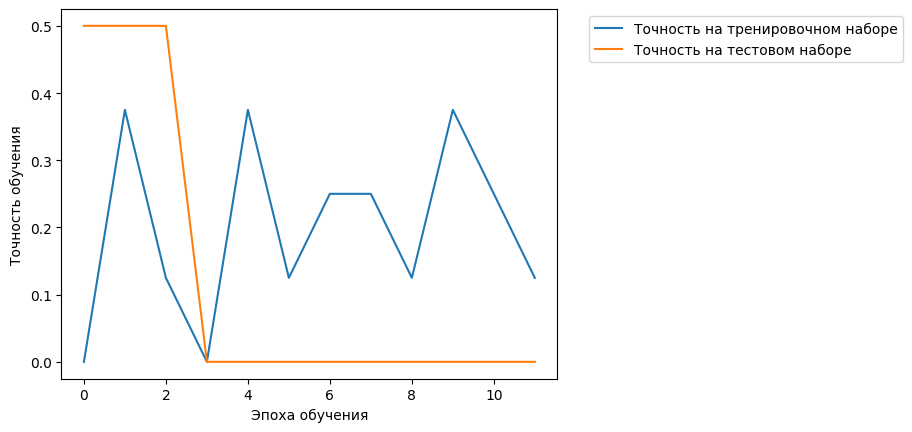

In [19]:
plt.plot(history.history['accuracy'], label='Точность на тренировочном наборе')
plt.plot(history.history['val_accuracy'], label='Точность на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность обучения')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Проверка сети

In [20]:
text = '''
Среди них отрыжка, изжога, чувство тяжести и распирания после приема пищи, метеоризм,
тошнота, рвота, приносящая временное облегчение.
Также для обострений язвы желудка характерно нарушение стула.
Чаще им сопутствуют запор, «овечий» кал плотной консистенции,
но может развиться и диарея. Снижение аппетита.
'''

In [21]:
text_matrix = tokenizer.texts_to_matrix([text])
text_matrix

array([[0., 1., 0., ..., 0., 0., 0.]])

In [22]:
onehot_to_text(text_matrix, tokenizer, 0.5)[0]

['unknown',
 'и',
 'тошнота',
 'рвота',
 'после',
 'отрыжка',
 'аппетита',
 'изжога',
 'может',
 'снижение',
 'пищи',
 'диарея',
 'метеоризм',
 'чувство',
 'желудка',
 'нарушение',
 'тяжести',
 'запор',
 'приема',
 'стула',
 'кал',
 'также',
 'распирания',
 'но',
 'чаще',
 'развиться',
 'язвы',
 'облегчение',
 'приносящая',
 'характерно',
 'них']

In [23]:
le.inverse_transform([np.argmax(model.predict(text_matrix))])

1/1 [==============================] - 0s 112ms/step


array(['Дуоденит'], dtype=object)

#### Не верно, правильный ответ - Язва

---
<a id='emb_Conv1D'></a>
# 2 попытка Embedding + Conv1D
---
### Самая удачная 3 попытка, обученая данными нарезаными плавающим окном
#### <a href='#dense'> 1 попытка стандартная Dense сеть</a>
#### <a href='#emb_Conv1D_window'>3 попытка Embedding + Conv1D <br> Обучение по средствам плавающего окна</a>

In [24]:
# Базовые библиоткеи
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Для работы с сетями
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# Обычные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten
# Сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D,  GlobalMaxPooling1D


# Инструменты обработки текста
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Загрузка данных

Перед началом работы, необходимо импортировать данные, сделать это можно при помощи стандартных os библиотек, для чтения данных и pandas для хранения и изменения

In [25]:
# Путь к базе
path = 'база болезней/'
# При помощи простого выражения (list comprehension) можно создать список из всех болезней
diseases_names = [x.split('.')[0] for x in os.listdir(path)]
diseases_names

['Аппендицит',
 'Гастрит',
 'Гепатит',
 'Дуоденит',
 'Колит',
 'Панкреатит',
 'Холицестит',
 'Эзофагит',
 'Энтерит',
 'Язва']

In [26]:
# Создание набора данных (DataFrmae)
df = pd.DataFrame(columns=['disease_name', 'disease_description'])
# При помощи цикла проходимся по списку
for disease in diseases_names:
    # Открываем каждый файл для чтения
    with open(path+disease+'.txt', mode='r', encoding='utf-8-sig') as f:
        current_disease = f.read()
        # Добавление названия болещни и ее описания в набор данных
        df = pd.concat([df, pd.DataFrame({'disease_name':[disease], 'disease_description':[current_disease]})], ignore_index=True)

In [27]:
# Удаление лишних символов переноса строки
df['disease_description'] = df['disease_description'].apply(lambda x: x.replace('\n', ' '))
df

,disease_name,disease_description
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,..."
4,Колит,"постоянные позывы на дефекацию, урчание, вздут..."
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...
6,Холицестит,"тупая, ноющая боль в области правого подреберь..."
7,Эзофагит,затруднения и болезненные ощущения при глотани...
8,Энтерит,внезапныые боли (преимущественно в середине жи...
9,Язва,"боль, часто локализованная в эпигастрии и умен..."


In [28]:
all_diseases_description = ' '.join(df['disease_description'].values)

### Обучение токенизатора

In [29]:
max_words_count = 1800
tokenizer = Tokenizer(num_words=max_words_count,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='unknown'
)

tokenizer.fit_on_texts([all_diseases_description])
items = list(tokenizer.word_index.items())
print(items[:100])
print("Размер словаря", len(items)) # Длина словаря

[('unknown', 1), ('в', 2), ('и', 3), ('боль', 4), ('тошнота', 5), ('или', 6), ('рвота', 7), ('боли', 8), ('живота', 9), ('при', 10), ('животе', 11), ('после', 12), ('области', 13), ('отрыжка', 14), ('с', 15), ('слабость', 16), ('аппетита', 17), ('во', 18), ('тела', 19), ('изжога', 20), ('вздутие', 21), ('может', 22), ('снижение', 23), ('пищи', 24), ('повышение', 25), ('температуры', 26), ('рту', 27), ('еды', 28), ('диарея', 29), ('на', 30), ('иногда', 31), ('до', 32), ('к', 33), ('метеоризм', 34), ('температура', 35), ('подреберье', 36), ('верхней', 37), ('части', 38), ('не', 39), ('правом', 40), ('стул', 41), ('потеря', 42), ('чувство', 43), ('общая', 44), ('эпигастральной', 45), ('желудка', 46), ('урчание', 47), ('–', 48), ('ощущение', 49), ('отсутствие', 50), ('ощущения', 51), ('понос', 52), ('нарушение', 53), ('позывы', 54), ('тяжести', 55), ('которая', 56), ('запор', 57), ('время', 58), ('приема', 59), ('кожи', 60), ('могут', 61), ('появление', 62), ('повышенная', 63), ('эпигастри

In [30]:
tokenizer.word_index['язв']

878

#### Преобразование данных

In [31]:
df['sequences_description'] = df['disease_description'].apply(lambda x: tokenizer.texts_to_sequences([x]))

In [32]:
df

,disease_name,disease_description,sequences_description
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...,"[[99, 4, 2, 11, 25, 26, 879, 211, 5, 100, 4, 2..."
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...,"[[592, 130, 334, 66, 3, 43, 101, 593, 2, 160, ..."
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...,"[[133, 1008, 1009, 1010, 1011, 25, 26, 19, 97,..."
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,...","[[4, 2, 45, 13, 5, 7, 44, 16, 86, 10, 173, 2, ..."
4,Колит,"постоянные позывы на дефекацию, урчание, вздут...","[[295, 54, 30, 202, 47, 21, 9, 1149, 52, 31, 1..."
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...,"[[4, 10, 308, 91, 116, 1304, 85, 83, 425, 331,..."
6,Холицестит,"тупая, ноющая боль в области правого подреберь...","[[153, 112, 4, 2, 13, 313, 393, 1615, 106, 6, ..."
7,Эзофагит,затруднения и болезненные ощущения при глотани...,"[[544, 3, 178, 51, 10, 208, 20, 8, 18, 27, 51,..."
8,Энтерит,внезапныые боли (преимущественно в середине жи...,"[[1, 8, 414, 2, 858, 9, 7, 52, 25, 26, 130, 39..."
9,Язва,"боль, часто локализованная в эпигастрии и умен...","[[4, 72, 699, 2, 64, 3, 1, 12, 28, 6, 553, 4, ..."


#### Проверка распределения

Теперь, что бы убедится, что все коныертировалось верно, проверю матрицу

In [33]:
'язв' in tokenizer.sequences_to_texts(df['sequences_description'][9])[0].split(' ')

True

#### Индрексация названия болезней

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['disease_indexes'] = le.fit_transform(df['disease_name'].values)

In [35]:
df

,disease_name,disease_description,sequences_description,disease_indexes
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...,"[[99, 4, 2, 11, 25, 26, 879, 211, 5, 100, 4, 2...",0
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...,"[[592, 130, 334, 66, 3, 43, 101, 593, 2, 160, ...",1
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...,"[[133, 1008, 1009, 1010, 1011, 25, 26, 19, 97,...",2
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,...","[[4, 2, 45, 13, 5, 7, 44, 16, 86, 10, 173, 2, ...",3
4,Колит,"постоянные позывы на дефекацию, урчание, вздут...","[[295, 54, 30, 202, 47, 21, 9, 1149, 52, 31, 1...",4
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...,"[[4, 10, 308, 91, 116, 1304, 85, 83, 425, 331,...",5
6,Холицестит,"тупая, ноющая боль в области правого подреберь...","[[153, 112, 4, 2, 13, 313, 393, 1615, 106, 6, ...",6
7,Эзофагит,затруднения и болезненные ощущения при глотани...,"[[544, 3, 178, 51, 10, 208, 20, 8, 18, 27, 51,...",7
8,Энтерит,внезапныые боли (преимущественно в середине жи...,"[[1, 8, 414, 2, 858, 9, 7, 52, 25, 26, 130, 39...",8
9,Язва,"боль, часто локализованная в эпигастрии и умен...","[[4, 72, 699, 2, 64, 3, 1, 12, 28, 6, 553, 4, ...",9


#### Обьединение данных и формирование обучающей и тестовой выборки

In [36]:
maxlen = 800
#Формируем матрицу индексов по принципу Bag of Words
xAll =  [x[0] for x in df['sequences_description'].values]#Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
xAll = pad_sequences(xAll, maxlen=maxlen, padding='pre', truncating='pre') #Преобразуем входные векторы
print(xAll.shape)  #Посмотрим на форму текстов

(10, 800)


In [37]:
yAll = utils.to_categorical(df['disease_indexes'], df['disease_indexes'].shape[0]) # И выводим каждый лейбл в виде вектора длиной 22, с 1кой в позиции соответствующего класса и нулями
print(yAll.shape) # Посмотрим на форму лейблов категорий
print(yAll[0]) # И отдельно на первую строку

(10, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Создание сети

In [38]:
model = Sequential()
# Embedding слой
model.add(Embedding(max_words_count, 16, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())

# Сверточные слои
model.add(Conv1D(20, 5, activation='relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(20, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Выппрямление вектора и его нормализация
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(yAll.shape[0], activation='softmax'))

Компиляция модели

In [39]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Обучение модели

In [40]:
history = model.fit(xAll,
          yAll,
          batch_size=16,
          epochs=16,
          validation_data=(xAll, yAll))

Epoch 1/16
1/1 [==============================] - 3s 3s/step - loss: 3.1614 - accuracy: 0.2000 - val_loss: 2.3031 - val_accuracy: 0.0000e+00
Epoch 2/16
1/1 [==============================] - 0s 40ms/step - loss: 3.2912 - accuracy: 0.1000 - val_loss: 2.3017 - val_accuracy: 0.1000
Epoch 3/16
1/1 [==============================] - 0s 38ms/step - loss: 3.2317 - accuracy: 0.3000 - val_loss: 2.3011 - val_accuracy: 0.1000
Epoch 4/16
1/1 [==============================] - 0s 38ms/step - loss: 2.6617 - accuracy: 0.1000 - val_loss: 2.3012 - val_accuracy: 0.1000
Epoch 5/16
1/1 [==============================] - 0s 42ms/step - loss: 3.2733 - accuracy: 0.1000 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 6/16
1/1 [==============================] - 0s 38ms/step - loss: 2.3870 - accuracy: 0.0000e+00 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/16
1/1 [==============================] - 0s 42ms/step - loss: 3.0396 - accuracy: 0.0000e+00 - val_loss: 2.3016 - val_accuracy: 0.1000
Epoch 8/16
1/1 [=

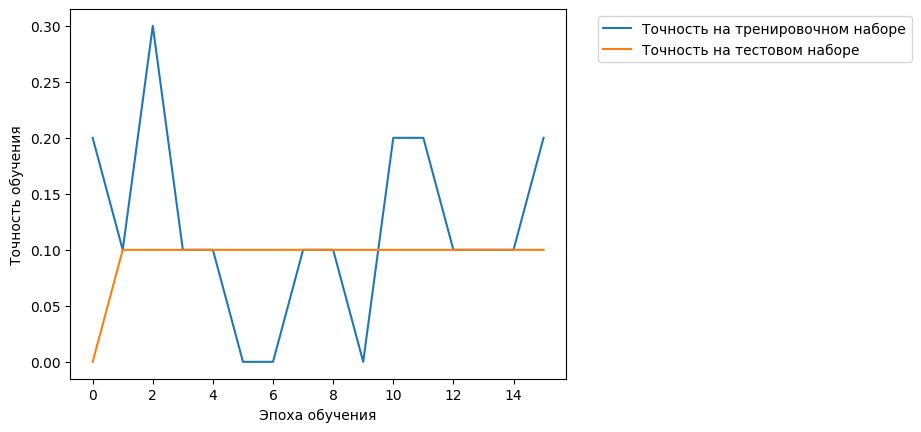

In [41]:
plt.plot(history.history['accuracy'], label='Точность на тренировочном наборе')
plt.plot(history.history['val_accuracy'], label='Точность на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность обучения')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Проверка сети

In [42]:
text = '''
Среди них отрыжка, изжога, чувство тяжести и распирания после приема пищи, метеоризм,
тошнота, рвота, приносящая временное облегчение.
Также для обострений язвы желудка характерно нарушение стула.
Чаще им сопутствуют запор, «овечий» кал плотной консистенции,
но может развиться и диарея. Снижение аппетита.
'''

In [43]:
text_sequences = tokenizer.texts_to_sequences([text])
text_sequences

[[1,
  1359,
  14,
  20,
  43,
  55,
  3,
  242,
  12,
  59,
  24,
  34,
  5,
  7,
  795,
  1,
  788,
  151,
  1,
  1,
  703,
  46,
  1100,
  53,
  65,
  346,
  1,
  1,
  57,
  1,
  139,
  1,
  1,
  263,
  22,
  603,
  3,
  29,
  23,
  17]]

In [44]:
tokenizer.sequences_to_texts(text_sequences)[0]

'unknown них отрыжка изжога чувство тяжести и распирания после приема пищи метеоризм тошнота рвота приносящая unknown облегчение также unknown unknown язвы желудка характерно нарушение стула чаще unknown unknown запор unknown кал unknown unknown но может развиться и диарея снижение аппетита'

In [45]:
text_sequences = pad_sequences(text_sequences, maxlen=maxlen)
le.inverse_transform([np.argmax(model.predict(text_sequences))])

1/1 [==============================] - 0s 131ms/step


array(['Эзофагит'], dtype=object)

#### Не верно, правильный ответ - Язва

---
<a id='emb_Conv1D_window'></a>
# 3 попытка Embedding + Conv1D
# Обучение по средствам плавающего окна
---
### Ссылка на 2 другие попытки, без плавающего окна
#### <a href='#dense'> 1 попытка стандартная Dense сеть</a>
#### <a href='#emb_Conv1D'>2 попытка Embedding + Conv1D</a>

In [1]:
# Базовые библиоткеи
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Для работы с сетями
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# Обычные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten
# Сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D,  GlobalMaxPooling1D


# Инструменты обработки текста
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Загрузка данных

Перед началом работы, необходимо импортировать данные, сделать это можно при помощи стандартных os библиотек, для чтения данных и pandas для хранения и изменения

In [47]:
# Путь к базе
path = 'база болезней/'
# При помощи простого выражения (list comprehension) можно создать список из всех болезней
diseases_names = [x.split('.')[0] for x in os.listdir(path)]
diseases_names

['Аппендицит',
 'Гастрит',
 'Гепатит',
 'Дуоденит',
 'Колит',
 'Панкреатит',
 'Холицестит',
 'Эзофагит',
 'Энтерит',
 'Язва']

In [48]:
# Создание набора данных (DataFrmae)
df = pd.DataFrame(columns=['disease_name', 'disease_description'])
# При помощи цикла проходимся по списку
for disease in diseases_names:
    # Открываем каждый файл для чтения
    with open(path+disease+'.txt', mode='r', encoding='utf-8-sig') as f:
        current_disease = f.read()
        # Добавление названия болещни и ее описания в набор данных
        df = pd.concat([df, pd.DataFrame({'disease_name':[disease], 'disease_description':[current_disease]})], ignore_index=True)

In [49]:
# Удаление лишних символов переноса строки
df['disease_description'] = df['disease_description'].apply(lambda x: x.replace('\n', ' '))
df

,disease_name,disease_description
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,..."
4,Колит,"постоянные позывы на дефекацию, урчание, вздут..."
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...
6,Холицестит,"тупая, ноющая боль в области правого подреберь..."
7,Эзофагит,затруднения и болезненные ощущения при глотани...
8,Энтерит,внезапныые боли (преимущественно в середине жи...
9,Язва,"боль, часто локализованная в эпигастрии и умен..."


In [50]:
all_diseases_description = ' '.join(df['disease_description'].values)

### Обучение токенизатора

In [51]:
max_words_count = 1800
tokenizer = Tokenizer(num_words=max_words_count,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='unknown'
)

tokenizer.fit_on_texts([all_diseases_description])
items = list(tokenizer.word_index.items())
print(items[:100])
print("Размер словаря", len(items)) # Длина словаря

[('unknown', 1), ('в', 2), ('и', 3), ('боль', 4), ('тошнота', 5), ('или', 6), ('рвота', 7), ('боли', 8), ('живота', 9), ('при', 10), ('животе', 11), ('после', 12), ('области', 13), ('отрыжка', 14), ('с', 15), ('слабость', 16), ('аппетита', 17), ('во', 18), ('тела', 19), ('изжога', 20), ('вздутие', 21), ('может', 22), ('снижение', 23), ('пищи', 24), ('повышение', 25), ('температуры', 26), ('рту', 27), ('еды', 28), ('диарея', 29), ('на', 30), ('иногда', 31), ('до', 32), ('к', 33), ('метеоризм', 34), ('температура', 35), ('подреберье', 36), ('верхней', 37), ('части', 38), ('не', 39), ('правом', 40), ('стул', 41), ('потеря', 42), ('чувство', 43), ('общая', 44), ('эпигастральной', 45), ('желудка', 46), ('урчание', 47), ('–', 48), ('ощущение', 49), ('отсутствие', 50), ('ощущения', 51), ('понос', 52), ('нарушение', 53), ('позывы', 54), ('тяжести', 55), ('которая', 56), ('запор', 57), ('время', 58), ('приема', 59), ('кожи', 60), ('могут', 61), ('появление', 62), ('повышенная', 63), ('эпигастри

In [52]:
tokenizer.word_index['язв']

878

#### Преобразование данных

In [53]:
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
def getSetFromIndexes(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна
    xSample = [] # Объявляем переменную для векторов
    wordsLen = len(wordIndexes) # Считаем количество слов
    index = 0 # Задаем начальный индекс 

    while (index + xLen <= wordsLen):# Идём по всей длине вектора индексов
        xSample.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
        index += step # Смещаеммся вперёд на step
    
    return xSample

In [54]:
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
def createSetsMultiClasses(wordIndexes, xLen, step): # Функция принимает последовательность индексов, размер окна, шаг окна

    # Для каждого из 6 классов
    # Создаём обучающую/проверочную выборку из индексов
    nClasses = len(wordIndexes) # Задаем количество классов выборки
    classesXSamples = []        # Здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна (например, 6 по 1341*1000)"
    for wI in wordIndexes:      # Для каждого текста выборки из последовательности индексов
        classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # Добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

    # Формируем один общий xSamples
    xSamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна (например, 15779*1000)"
    ySamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"

    for t in range(nClasses): # В диапазоне кол-ва классов(6)
        xT = classesXSamples[t] # Берем очередной текст вида "кол-во окон в тексте*длину окна"(например, 1341*1000)
        for i in range(len(xT)): # И каждое его окно
            xSamples.append(xT[i]) # Добавляем в общий список выборки
            ySamples.append(utils.to_categorical(t, nClasses)) # Добавляем соответствующий вектор класса

    xSamples = np.array(xSamples) # Переводим в массив numpy для подачи в нейронку
    ySamples = np.array(ySamples) # Переводим в массив numpy для подачи в нейронку

  
    return (xSamples, ySamples) #Функция возвращает выборку и соответствующие векторы классов

In [55]:
#Задаём базовые параметры
xLen = 100 #Длина отрезка текста, по которой анализируем, в словах
step = 10 #Шаг разбиения исходного текста на обучающие векторы

In [56]:
df['sequences_description'] = df['disease_description'].apply(lambda x: tokenizer.texts_to_sequences([x]))

In [57]:
df

,disease_name,disease_description,sequences_description
0,Аппендицит,Резкая боль в животе Повышение температуры Нап...,"[[99, 4, 2, 11, 25, 26, 879, 211, 5, 100, 4, 2..."
1,Гастрит,ГАСТРИТ СИМПТОМЫ диспепсии (тяжесть и чувство...,"[[592, 130, 334, 66, 3, 43, 101, 593, 2, 160, ..."
2,Гепатит,Желтуха начало гепатита напоминает грипп: повы...,"[[133, 1008, 1009, 1010, 1011, 25, 26, 19, 97,..."
3,Дуоденит,"боль в эпигастральной области, тошнота, рвота,...","[[4, 2, 45, 13, 5, 7, 44, 16, 86, 10, 173, 2, ..."
4,Колит,"постоянные позывы на дефекацию, урчание, вздут...","[[295, 54, 30, 202, 47, 21, 9, 1149, 52, 31, 1..."
5,Панкреатит,Боль при панкреатите обычно очень интенсивн...,"[[4, 10, 308, 91, 116, 1304, 85, 83, 425, 331,..."
6,Холицестит,"тупая, ноющая боль в области правого подреберь...","[[153, 112, 4, 2, 13, 313, 393, 1615, 106, 6, ..."
7,Эзофагит,затруднения и болезненные ощущения при глотани...,"[[544, 3, 178, 51, 10, 208, 20, 8, 18, 27, 51,..."
8,Энтерит,внезапныые боли (преимущественно в середине жи...,"[[1, 8, 414, 2, 858, 9, 7, 52, 25, 26, 130, 39..."
9,Язва,"боль, часто локализованная в эпигастрии и умен...","[[4, 72, 699, 2, 64, 3, 1, 12, 28, 6, 553, 4, ..."


#### Проверка распределения

Теперь, что бы убедится, что все коныертировалось верно, проверю матрицу

In [58]:
'язв' in tokenizer.sequences_to_texts(df['sequences_description'][9])[0].split(' ')

True

In [59]:
maxlen = 800
#Формируем матрицу индексов по принципу Bag of Words
xAll =  [x[0] for x in df['sequences_description'].values]#Каждое слово из текста нашло свой индекс в векторе длиной maxWordsCount и отметилось в нем единичкой 
xAll = pad_sequences(xAll, maxlen=maxlen, padding='pre', truncating='pre') #Преобразуем входные векторы
print(xAll.shape)  #Посмотрим на форму текстов

(10, 800)


In [60]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(xAll, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(xAll, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(710, 100)
(710, 10)
(710, 100)
(710, 10)


### Создание сети

In [61]:
model = Sequential()
# Embedding слой
model.add(Embedding(max_words_count, 16, input_length=xLen))
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())

# Сверточные слои
model.add(Conv1D(20, 5, activation='relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(20, 5, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Выппрямление вектора и его нормализация
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(yAll.shape[0], activation='softmax'))

Компиляция модели

In [62]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Обучение модели

In [63]:
history = model.fit(xTrain, 
          yTrain,
          batch_size=16,
          epochs=16)

Epoch 1/16
45/45 [==============================] - 2s 22ms/step - loss: 3.2318 - accuracy: 0.0817
Epoch 2/16
45/45 [==============================] - 1s 15ms/step - loss: 3.1467 - accuracy: 0.1042
Epoch 3/16
45/45 [==============================] - 1s 15ms/step - loss: 2.8856 - accuracy: 0.1239
Epoch 4/16
45/45 [==============================] - 1s 15ms/step - loss: 2.9069 - accuracy: 0.1324
Epoch 5/16
45/45 [==============================] - 1s 19ms/step - loss: 2.8762 - accuracy: 0.1254
Epoch 6/16
45/45 [==============================] - 1s 20ms/step - loss: 2.7384 - accuracy: 0.1563
Epoch 7/16
45/45 [==============================] - 1s 19ms/step - loss: 2.7909 - accuracy: 0.1535
Epoch 8/16
45/45 [==============================] - 1s 19ms/step - loss: 2.7144 - accuracy: 0.1606
Epoch 9/16
45/45 [==============================] - 1s 19ms/step - loss: 2.6671 - accuracy: 0.1479
Epoch 10/16
45/45 [==============================] - 1s 20ms/step - loss: 2.7121 - accuracy: 0.1662
Epoch 11/

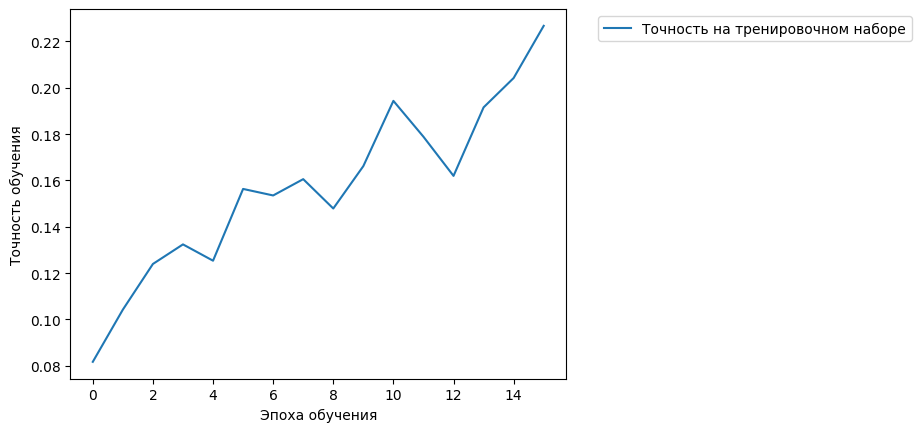

In [65]:
plt.plot(history.history['accuracy'], label='Точность на тренировочном наборе')
# plt.plot(history.history['val_accuracy'], label='Точность на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность обучения')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Проверка сети

#### Тест 1

In [70]:
text = '''
Среди них отрыжка, изжога, чувство тяжести и распирания после приема пищи, метеоризм,
тошнота, рвота, приносящая временное облегчение.
Также для обострений язвы желудка характерно нарушение стула.
Чаще им сопутствуют запор, «овечий» кал плотной консистенции,
но может развиться и диарея. Снижение аппетита.
'''

In [71]:
text_sequences = tokenizer.texts_to_sequences([text])
# text_sequences

In [72]:
tokenizer.sequences_to_texts(text_sequences)[0]

'unknown них отрыжка изжога чувство тяжести и распирания после приема пищи метеоризм тошнота рвота приносящая unknown облегчение также unknown unknown язвы желудка характерно нарушение стула чаще unknown unknown запор unknown кал unknown unknown но может развиться и диарея снижение аппетита'

In [73]:
text_sequences = pad_sequences(text_sequences, maxlen=xLen)
le.inverse_transform([np.argmax(model.predict(text_sequences))])

1/1 [==============================] - 0s 18ms/step


array(['Язва'], dtype=object)

#### Верно (язва)

#### Тест 2

In [83]:
text = '''
диарея;
слизь и/или кровь в фекалиях;
боль в животе слева;
чувство слабости;
повышение температуры тела;
потеря аппетита и веса;
частая потребность в опорожнении кишечника;
необъяснимое снижение массы тела;
'''

In [84]:
text_sequences = tokenizer.texts_to_sequences([text])
# text_sequences

In [85]:
tokenizer.sequences_to_texts(text_sequences)[0]

'диарея слизь и или кровь в unknown боль в животе слева чувство слабости повышение температуры тела потеря аппетита и веса частая unknown в unknown кишечника unknown снижение массы тела'

In [86]:
text_sequences = pad_sequences(text_sequences, maxlen=xLen)
le.inverse_transform([np.argmax(model.predict(text_sequences))])

1/1 [==============================] - 0s 19ms/step


array(['Язва'], dtype=object)

#### Не верно (колит)

#### Тест 3

In [74]:
text = '''
постоянно присутствующее чувство тяжести в правом подреберье;
интенсивный кожный зуд;
желтизна на коже и слизистых;
кал становится светлым, а моча – темной;
у больного пропадает аппетит, но всегда присутствует тошнота;
периодические боли в области анатомического расположения печени;
'''

In [75]:
text_sequences = tokenizer.texts_to_sequences([text])
# text_sequences

In [76]:
tokenizer.sequences_to_texts(text_sequences)[0]

'постоянно unknown чувство тяжести в правом подреберье unknown кожный зуд желтизна на коже и слизистых кал становится unknown а моча – unknown у больного пропадает аппетит но всегда unknown тошнота периодические боли в области unknown расположения печени'

In [78]:
text_sequences = pad_sequences(text_sequences, maxlen=xLen)
le.inverse_transform([np.argmax(model.predict(text_sequences))])

1/1 [==============================] - 0s 17ms/step


array(['Язва'], dtype=object)

#### Не верное (Гепатит)

#### Тест 4

In [79]:
text = '''
боль в животе. Чаще всего она возникает в районе пупка, а затем смещается ниже и нарастает с развитием воспаления.
Боль при аппендиците усиливается при кашле или чихании, резких движениях или смене положения во сне.
'''

In [80]:
text_sequences = tokenizer.texts_to_sequences([text])
# text_sequences

In [81]:
tokenizer.sequences_to_texts(text_sequences)[0]

'боль в животе чаще всего она возникает в районе пупка а затем смещается unknown и нарастает с unknown воспаления боль при unknown усиливается при кашле или unknown резких движениях или unknown положения во сне'

In [82]:
text_sequences = pad_sequences(text_sequences, maxlen=xLen)
le.inverse_transform([np.argmax(model.predict(text_sequences))])

1/1 [==============================] - 0s 16ms/step


array(['Аппендицит'], dtype=object)

#### Верно (Аппендицит)

#### Тест 5

In [87]:
text = '''
Боль может быть приступообразной и постоянной Метеоризм,
потеря массы тела, выделение большого количества непереваренных жиров с калом являются проявлениями нарушения выработки
ферментов поджелудочной железы Тошнота, рвота могут сопровождать приступ боли
'''

In [88]:
text_sequences = tokenizer.texts_to_sequences([text])
# text_sequences

In [89]:
tokenizer.sequences_to_texts(text_sequences)[0]

'боль может быть unknown и постоянной метеоризм потеря массы тела выделение unknown unknown непереваренных unknown с unknown являются проявлениями нарушения unknown unknown поджелудочной железы тошнота рвота могут unknown приступ боли'

In [90]:
text_sequences = pad_sequences(text_sequences, maxlen=xLen)
le.inverse_transform([np.argmax(model.predict(text_sequences))])

1/1 [==============================] - 0s 16ms/step


array(['Язва'], dtype=object)

#### Не верное (панкреатит)

#### Тут не смотря на неправильное обучение, сеть показала хоть какой то результат, около 30% качество обучение и несколько верных ответов на тестировании

Чисто в теории если потестировать разные слои в сетке + достать данные для тестовой выборки, то можно значительно улучшить данную сеть